# 🏦 Credit Card Clustering

![banner-money.jpg](https://www.appa.es/wp-content/uploads/2018/05/banner-money-2724241_1920.jpg)

***Author:*** *Cesar Chalco Elias </br>*
***Twitter:*** *[@chesar_che](https://twitter.com/chesar_che)*

***Metadata:*** </br>
The Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. </br>

Data is available here: [data credit card holders](https://www.kaggle.com/arjunbhasin2013/ccdata)

***Purpose:***</br>
Clustering data on the basis of acquired attributes and determine the appropriate characteristics for the offers made to each customer segment.

***Attribute Information*** </br>
- *CUSTID:* Identification of Credit Card holder (Categorical) </br>
- *BALANCE:* Balance amount left in their account to make purchases  </br>
- *BALANCEFREQUENCY:* How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) </br>
- *PURCHASES:* Amount of purchases made from account </br>
- *ONEOFFPURCHASES:* Maximum purchase amount done in one-go </br>
- *INSTALLMENTSPURCHASES:* Amount of purchase done in installment </br>
- *CASHADVANCE:* Cash in advance given by the user </br>
- *PURCHASESFREQUENCY:* How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) </br>
- *ONEOFFPURCHASESFREQUENCY:* How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) </br>
- *PURCHASESINSTALLMENTSFREQUENCY:* How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) </br>
- *CASHADVANCEFREQUENCY:* How frequently the cash in advance being paid </br>
- *CASHADVANCETRX:* Number of Transactions made with "Cash in Advanced" </br>
- *PURCHASESTRX:* Numbe of purchase transactions made </br>
- *CREDITLIMIT:* Limit of Credit Card for user </br>
- *PAYMENTS:* Amount of Payment done by user </br>
- *MINIMUM_PAYMENTS:* Minimum amount of payments made by user </br>
- *PRCFULLPAYMENT:* Percent of full payment paid by user </br>
- *TENURE:* Tenure of credit card service for user </br>

## Packages

In [1]:
#  pip install altair==4.2.0rc1

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

import altair as alt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
print(' ..:: VERSIONS ::..')
print(f' Numpy version: {np.__version__}')
print(f' Pandas version: {pd.__version__}')
print(f' Altair version: {alt.__version__}')
print(f' Seaborn version: {sns.__version__}')
print(f' Matplotlib version: {mpl.__version__}')

 ..:: VERSIONS ::..
 Numpy version: 1.22.1
 Pandas version: 1.3.4
 Altair version: 4.2.0rc1
 Seaborn version: 0.11.2
 Matplotlib version: 3.5.0


## Data Reading and Understanding

In [4]:
data = pd.read_csv('data/CC GENERAL.csv', delimiter=',')

In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Inspection

In [6]:
def miss_values(df):
    return (df.isnull().sum() / df.shape[0]) * 100

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- All variables have a correct dtype.
- We aren't going to use variable "CUST_ID", so we can drop it.

In [8]:
data.duplicated().sum()

0

In [9]:
data.memory_usage(deep=True)

Index                                  128
CUST_ID                             563850
BALANCE                              71600
BALANCE_FREQUENCY                    71600
PURCHASES                            71600
ONEOFF_PURCHASES                     71600
INSTALLMENTS_PURCHASES               71600
CASH_ADVANCE                         71600
PURCHASES_FREQUENCY                  71600
ONEOFF_PURCHASES_FREQUENCY           71600
PURCHASES_INSTALLMENTS_FREQUENCY     71600
CASH_ADVANCE_FREQUENCY               71600
CASH_ADVANCE_TRX                     71600
PURCHASES_TRX                        71600
CREDIT_LIMIT                         71600
PAYMENTS                             71600
MINIMUM_PAYMENTS                     71600
PRC_FULL_PAYMENT                     71600
TENURE                               71600
dtype: int64

In [10]:
miss_values(data)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

- There are roughly 3.50% of misssing values
- Missing values are a minimum part of data, we can drop them for the analysis or impute them later.

## Data Cleaning

In [11]:
df = data.drop('CUST_ID', axis=1)

## Data Imputation

- I want to compute missing values with KNN Imputer. So, first, I have to scale the dataframe beacuse the imputer works with distances between the data.
- Let's check in if the dataset has outliers. Depend of that, I choose the most appropriate scaler.

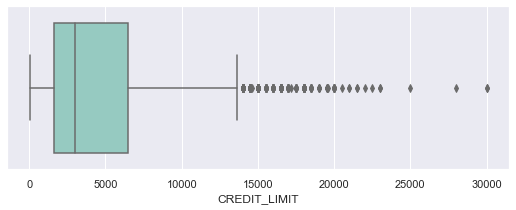

In [12]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(9,3)
sns.boxplot(x='CREDIT_LIMIT' , data=df, palette="Set3")
plt.show()

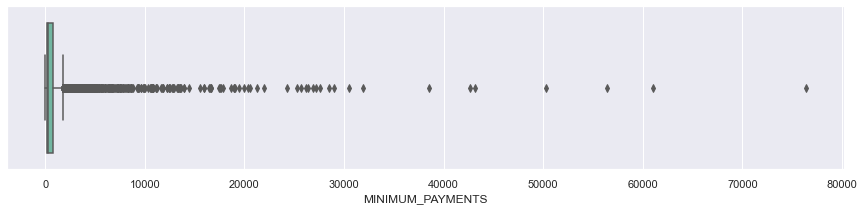

In [13]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
ax = sns.boxplot(x='MINIMUM_PAYMENTS' , data=df, palette="Set2")
plt.show()

In [14]:
df[['MINIMUM_PAYMENTS']].describe(percentiles=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]).T

,count,mean,std,min,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
MINIMUM_PAYMENTS,8637.0,864.206542,2372.446607,0.019163,19.524478,106.034864,154.561199,178.851603,216.651805,312.343947,462.268789,671.283261,1026.297507,1780.651744,9034.098737,76406.20752


- There are too much outliers. So, the best scaler for this situation is the Robust Scaler

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(df)

In [16]:
array_scaled = scaler.transform(df)

In [17]:
df_scaled = pd.DataFrame(array_scaled, columns=df.columns, index=df.index)

In [18]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.358848,1.080833,-0.453504,-0.386894,2.951740e-17,0.613106,9.434627
BALANCE_FREQUENCY,8950.0,-1.104565,2.132138,-9.000009,-1.000000,0.000000e+00,0.000000,0.000000
PURCHASES,8950.0,0.599652,1.995932,-0.337489,-0.300464,2.653585e-17,0.699536,45.472693
ONEOFF_PURCHASES,8950.0,0.960223,2.874738,-0.065812,-0.065812,0.000000e+00,0.934188,70.528052
INSTALLMENTS_PURCHASES,8950.0,0.687243,1.929718,-0.189912,-0.189912,0.000000e+00,0.810088,47.821611
CASH_ADVANCE,8950.0,0.878840,1.882855,0.000000,0.000000,0.000000e+00,1.000000,42.320270
PURCHASES_FREQUENCY,8950.0,-0.011579,0.481645,-0.600000,-0.500000,0.000000e+00,0.500000,0.600000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.397082,0.994454,-0.277777,-0.277777,0.000000e+00,0.722223,3.055557
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.263694,0.529930,-0.222223,-0.222223,0.000000e+00,0.777777,1.111111
CASH_ADVANCE_FREQUENCY,8950.0,0.608150,0.900547,0.000000,0.000000,0.000000e+00,1.000000,6.750007


- Now, all values are scaled to the IQR.
- Data is ready to imputation with KNN algorithm.

In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # I chose 5 nearest neighbors to take the mean

In [20]:
col_miss = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']

miss_values(df_scaled[col_miss])

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

In [21]:
array_imputed = imputer.fit_transform(df_scaled)

In [22]:
df_imputed = pd.DataFrame(array_imputed, columns=df_scaled.columns, index=df_scaled.index)

In [23]:
miss_values(df_imputed[col_miss])

CREDIT_LIMIT        0.0
MINIMUM_PAYMENTS    0.0
dtype: float64

In [24]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.358848,1.080833,-0.453504,-0.386894,2.951740e-17,0.613106,9.434627
BALANCE_FREQUENCY,8950.0,-1.104565,2.132138,-9.000009,-1.000000,0.000000e+00,0.000000,0.000000
PURCHASES,8950.0,0.599652,1.995932,-0.337489,-0.300464,2.653585e-17,0.699536,45.472693
ONEOFF_PURCHASES,8950.0,0.960223,2.874738,-0.065812,-0.065812,0.000000e+00,0.934188,70.528052
INSTALLMENTS_PURCHASES,8950.0,0.687243,1.929718,-0.189912,-0.189912,0.000000e+00,0.810088,47.821611
CASH_ADVANCE,8950.0,0.878840,1.882855,0.000000,0.000000,0.000000e+00,1.000000,42.320270
PURCHASES_FREQUENCY,8950.0,-0.011579,0.481645,-0.600000,-0.500000,0.000000e+00,0.500000,0.600000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.397082,0.994454,-0.277777,-0.277777,0.000000e+00,0.722223,3.055557
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.263694,0.529930,-0.222223,-0.222223,0.000000e+00,0.777777,1.111111
CASH_ADVANCE_FREQUENCY,8950.0,0.608150,0.900547,0.000000,0.000000,0.000000e+00,1.000000,6.750007


- The imputation is correct. The KNN didn't alter much values in original datadrame.

In [25]:
array_final = scaler.inverse_transform(array_imputed)

In [26]:
df_final = pd.DataFrame(array_final, columns=df_imputed.columns, index=df_imputed.index)

In [27]:
def kdeplot(category):
    try:
        aux_df = pd.DataFrame()
        aux_df['original'] = df[category]
        aux_df['imputed'] = df_final[category]
        aux_df =  aux_df.melt(value_vars=['original','imputed'], value_name='values',var_name='variables')

        fig, ax = plt.subplots()
        fig.set_size_inches(15,5)
        sns.kdeplot(x='values', hue='variables', data=aux_df,fill=True, cumulative=True)
        ax.set_xlabel(f'{category}')
        plt.show()
    except:
        print('Your category is not correct. Check it, please.')

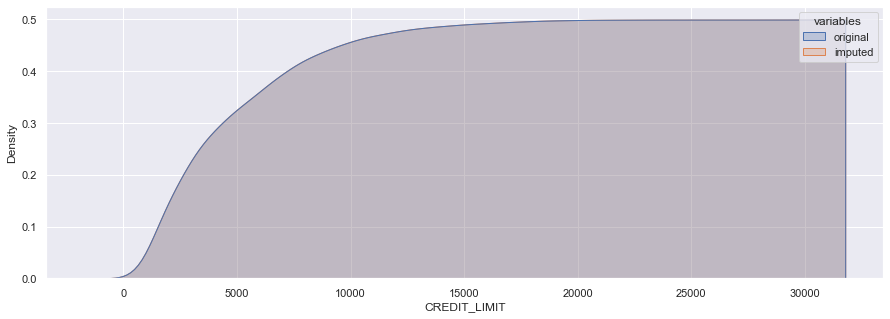

In [28]:
kdeplot('CREDIT_LIMIT')

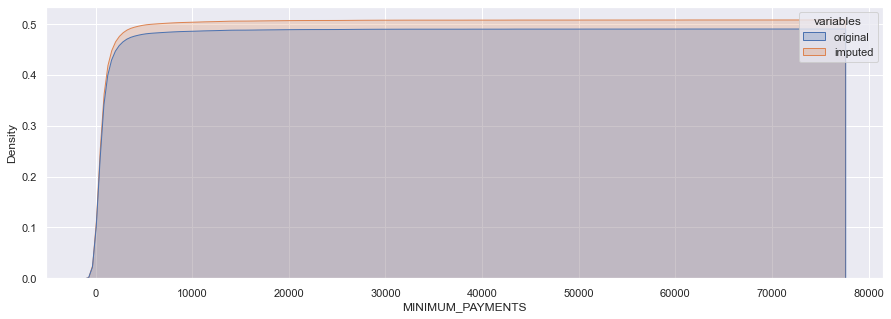

In [29]:
kdeplot('MINIMUM_PAYMENTS')

- Dataframe looks great and it is ready for analysis.

## EDA

In [30]:
from pandas_profiling import ProfileReport

report = ProfileReport(df_final, title="Credit cards report", explorative=True)
report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

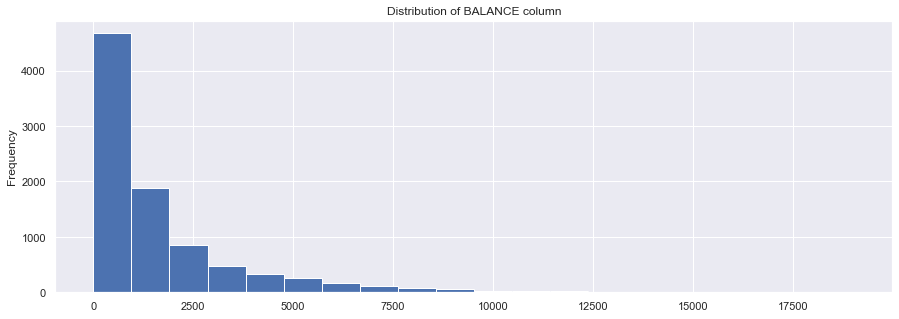

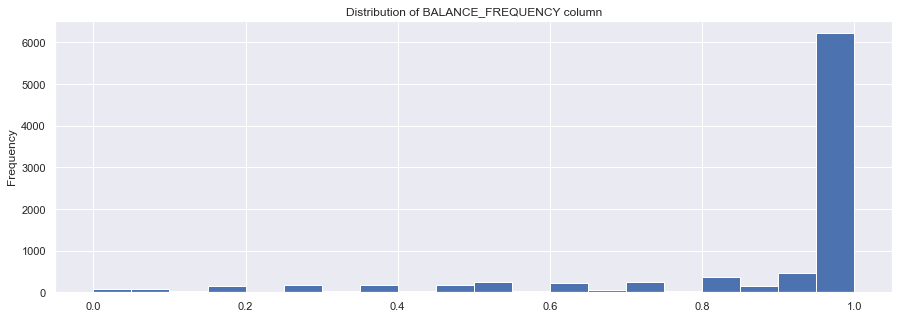

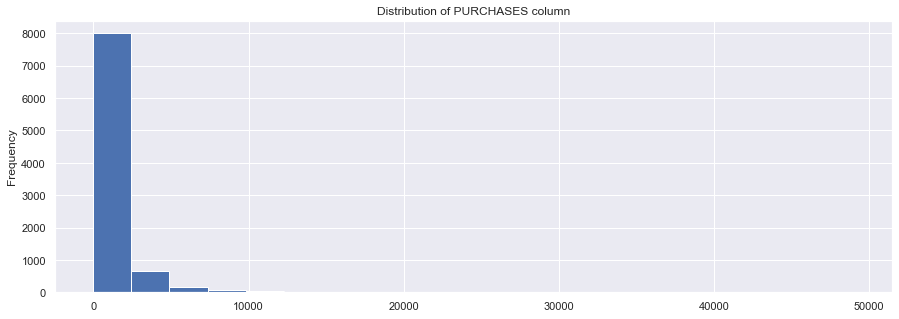

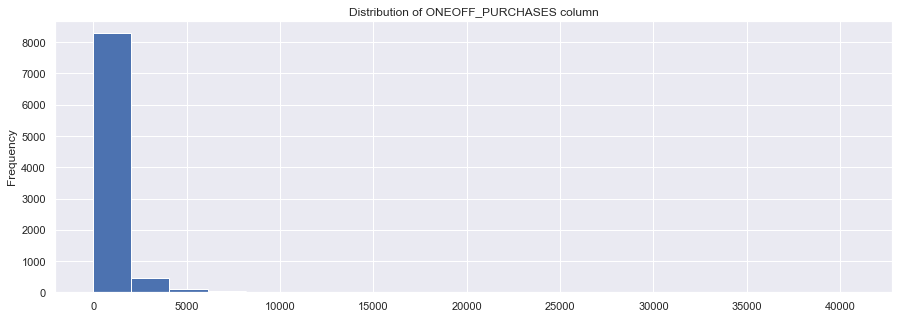

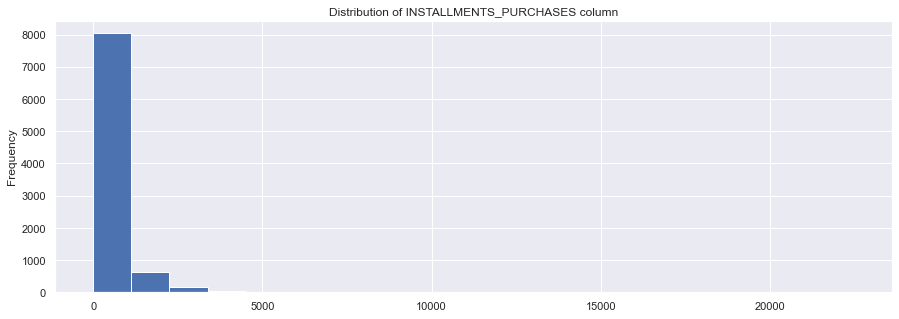

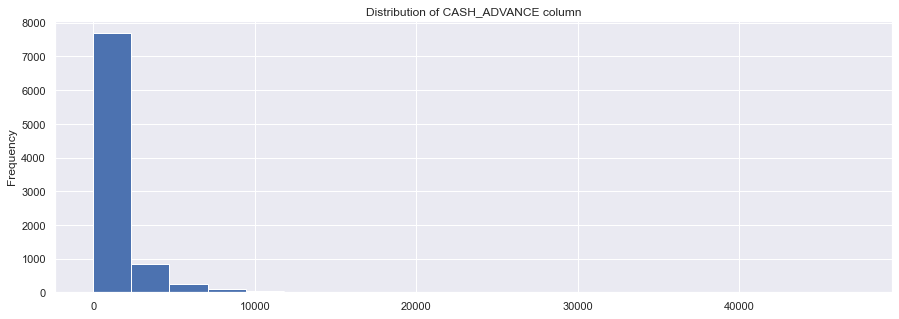

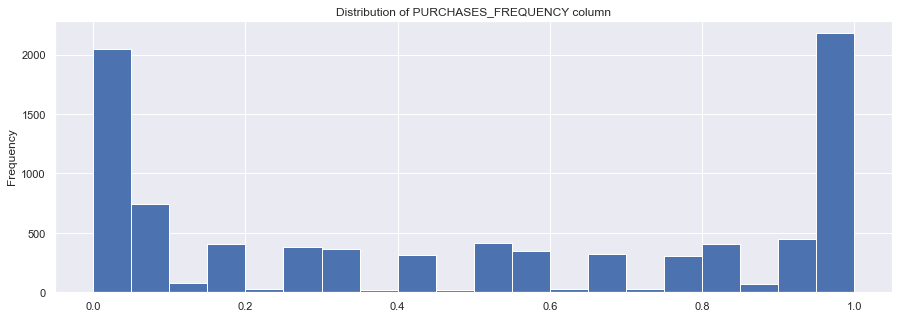

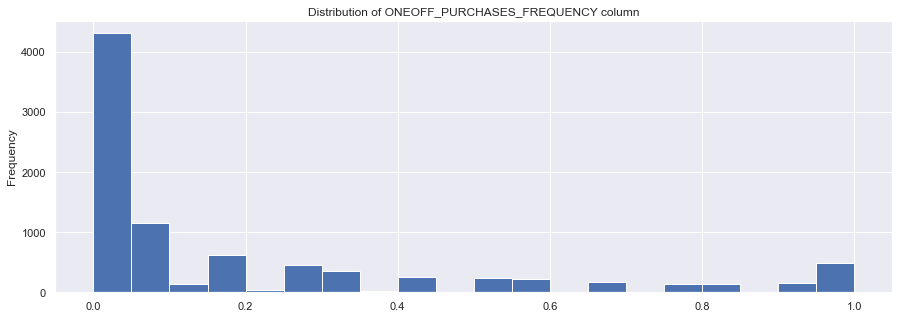

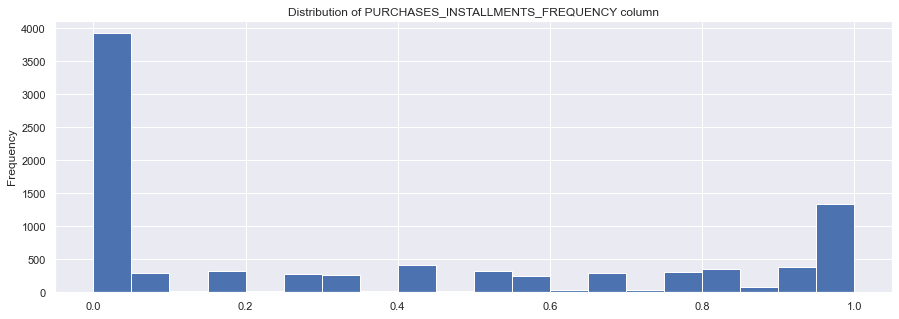

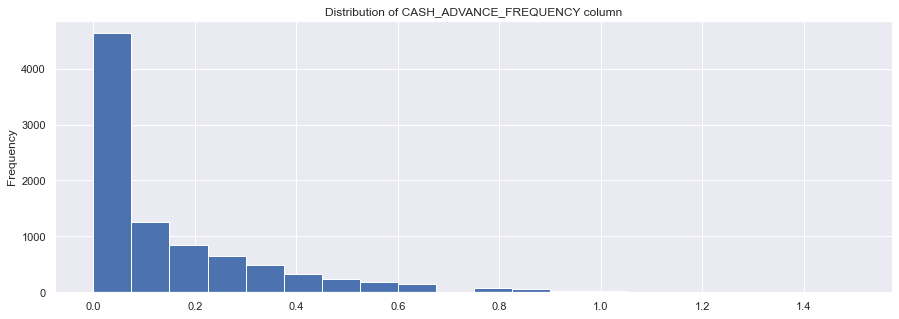

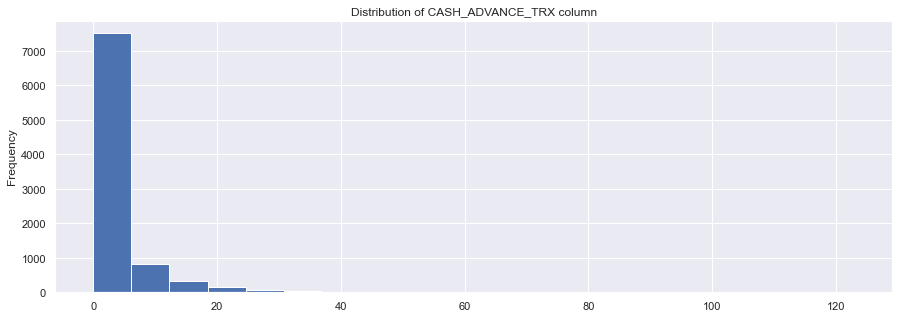

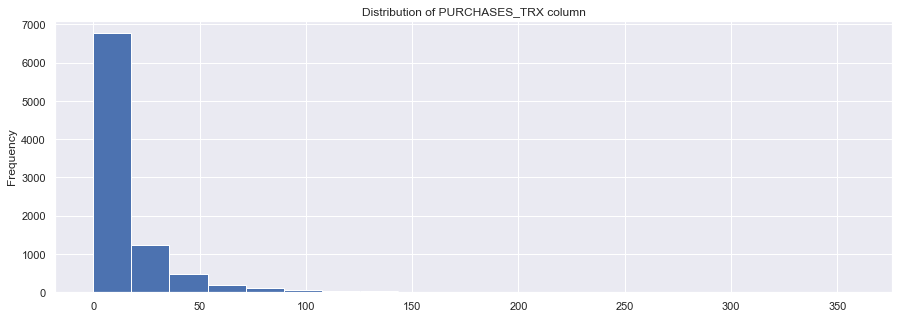

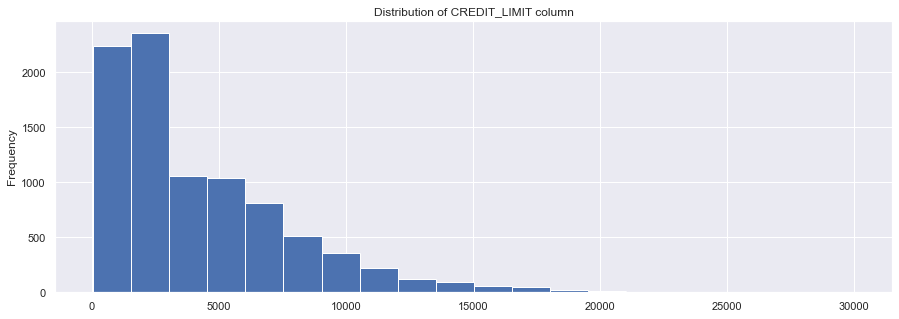

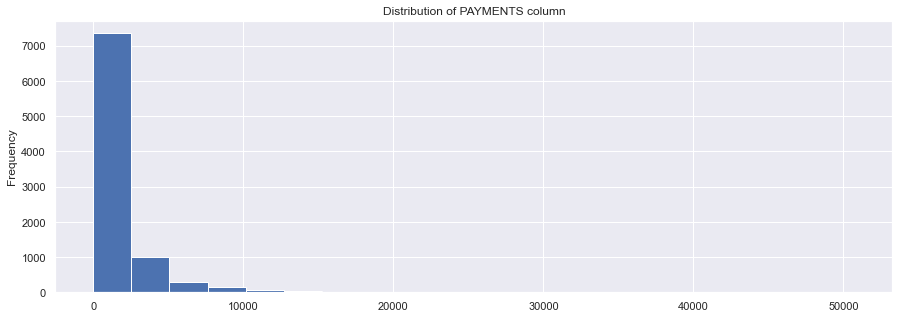

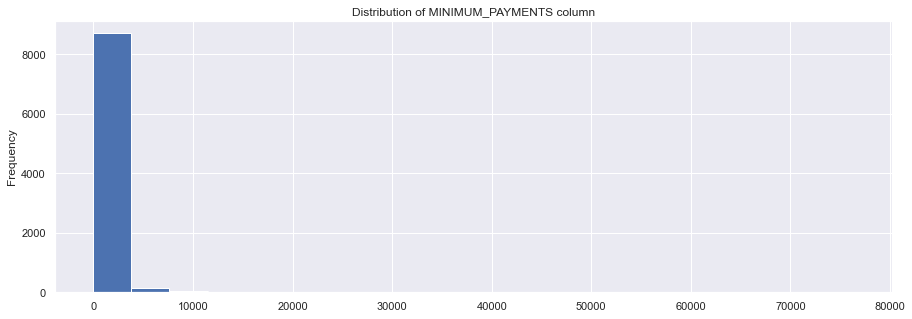

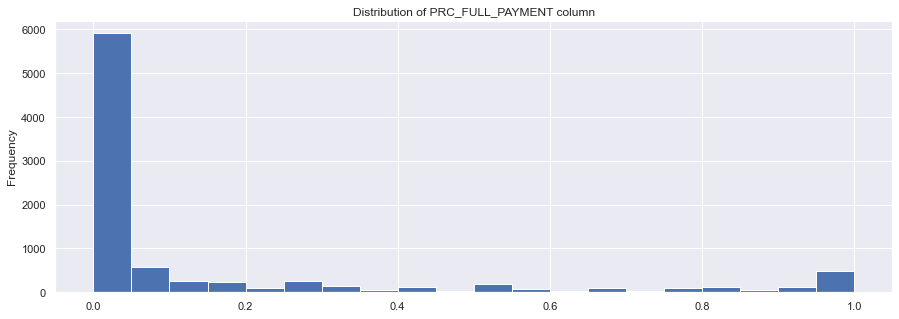

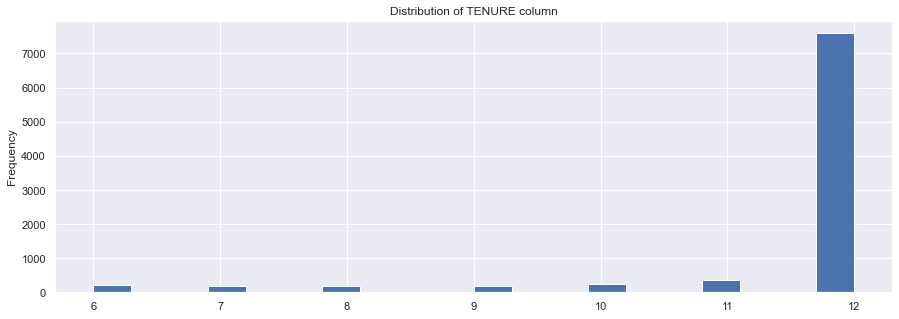

In [31]:
for c in df.columns:
    sns.set()
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    df_final[c].plot(kind='hist', bins=20)
    ax.set_title(f'Distribution of {c} column')

Comments:
- A lot of people have 7,500 dollars or below available for purchasing.
- Many accounts are updated frequently. So, they could be used daily possibly.
- Many accounts makes purchases for 10,000 or below.
- The most frequent purchase limit is 5,000 dollars.
- The most common amount of purchase done in installment is around 2,500 dollars which is under the most common amount available for make purchases for each account.
- The cash in advance is not paid frequently.
- Much people have a credit limit of 15,000 dollars.
- Each user have more than 5 credit cards.

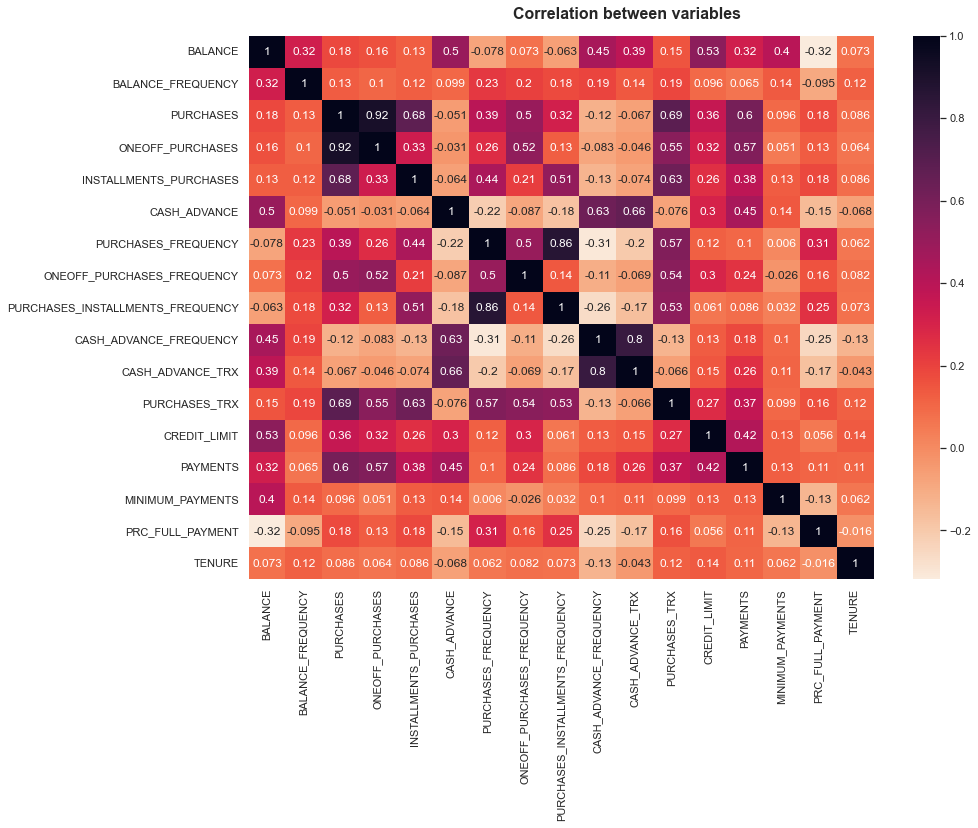

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(14,10)
fig.suptitle('Correlation between variables', fontweight="bold", fontsize=16, y=0.92)
ax = sns.heatmap(df_final.corr(),annot=True, cmap='rocket_r')
plt.show()

**Comment:** </br>
- There are many correlations between drivers.

## PCA

In [33]:
new_scaler = RobustScaler()

X = new_scaler.fit_transform(df_final)

In [34]:
len(df_final.columns)

17

In [35]:
from sklearn.decomposition import PCA

# I have 17 drivers in data
pca = PCA(n_components=17) # Instance the first analysis
pca = pca.fit(X)

In [36]:
explained_variance = pca.explained_variance_
print(f'Variance explained for each principal component: {explained_variance}')

Variance explained for each principal component: [1.71620827e+01 1.36973145e+01 7.02411393e+00 4.58419055e+00
 3.98481621e+00 3.05467191e+00 1.86539512e+00 1.49895879e+00
 1.15229353e+00 8.48464641e-01 6.33619813e-01 4.92048326e-01
 2.74104724e-01 2.22816147e-01 1.83617006e-01 1.26939298e-02
 5.58032753e-05]


In [37]:
sum(explained_variance > 1)

9

- For Kaiser criteria, I will stand 9 components (they explain a great part of variance according to his criteria)

In [38]:
PVE = pca.explained_variance_ratio_
print(f'Proportion of variance explained (PVE) for each principal component: {PVE}')

Proportion of variance explained (PVE) for each principal component: [3.02728912e-01 2.41612464e-01 1.23901184e-01 8.08623894e-02
 7.02897832e-02 5.38825921e-02 3.29044582e-02 2.64407397e-02
 2.03257711e-02 1.49664106e-02 1.11766759e-02 8.67943924e-03
 4.83504399e-03 3.93034405e-03 3.23889456e-03 2.23913357e-04
 9.84336522e-07]


In [39]:
np.cumsum(PVE)

array([0.30272891, 0.54434138, 0.66824256, 0.74910495, 0.81939473,
       0.87327732, 0.90618178, 0.93262252, 0.95294829, 0.9679147 ,
       0.97909138, 0.98777082, 0.99260586, 0.99653621, 0.9997751 ,
       0.99999902, 1.        ])

- For explained variance criteria, I can stand 4, 5 or 6 components (they explain a great part of variance according to his criteria).

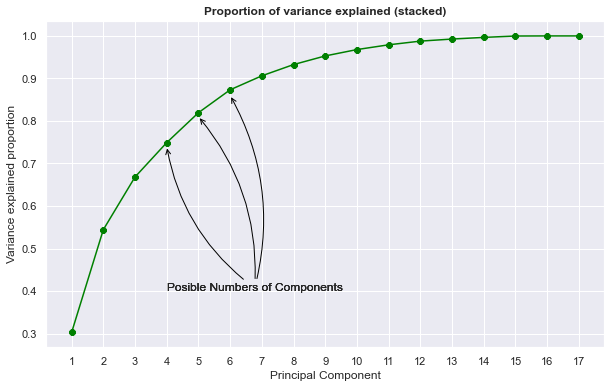

In [40]:
fig, ax = plt.subplots()
sum_pve = np.cumsum(pca.explained_variance_ratio_)
fig.set_size_inches(10,6)
ax.plot(range(1,18), sum_pve , color="green", marker ="8")
ax.set_title('Proportion of variance explained (stacked)', fontweight="bold")#, fontsize=11, y=1.02)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance explained proportion')
ax.set_xticks(np.arange(1,18,1))
an1 = ax.annotate('Posible Numbers of Components',
            xy=(4,0.74),
            xytext=(4, 0.4),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=-0.2'})
an2 = ax.annotate('Posible Numbers of Components',
            xy=(5,0.81),
            xytext=(4, 0.4),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=0.2'})
an3 = ax.annotate('Posible Numbers of Components',
            xy=(6,0.86),
            xytext=(4, 0.4),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=0.2'})

plt.show()

### Decision making:

- I will use 5 components.

In [41]:
pca_ = PCA(n_components=5).fit(X) # Instance and fit with data

In [42]:
# Finding out the factorial burdens
pca_loadings = pca_.components_
pca_loadings

array([[ 1.10036870e-01,  1.34065767e-01,  4.18444013e-01,
         5.53154687e-01,  2.74317354e-01,  6.57938663e-02,
         3.97297007e-02,  1.08722655e-01,  3.50798199e-02,
         6.88569496e-03,  3.61274994e-02,  2.46801631e-01,
         7.63411921e-02,  3.07267217e-01,  4.77868757e-01,
         4.44696887e-02,  4.23483050e-02],
       [ 1.05569610e-01,  6.49303945e-02, -2.48631110e-01,
        -3.66672774e-01, -1.16218663e-01,  1.38983944e-01,
        -3.45196826e-02, -9.13589903e-02, -2.53937242e-02,
         6.98147079e-02,  1.20905096e-01, -1.32190937e-01,
        -1.01525285e-02, -9.79631525e-02,  8.13412817e-01,
        -1.92508500e-01, -3.92192970e-04],
       [ 1.87151448e-01,  1.84904813e-01, -3.62777805e-02,
         3.02066277e-02, -1.20204299e-01,  5.88897616e-01,
        -5.00045361e-02, -1.60529242e-02, -5.21522205e-02,
         2.52903951e-01,  4.99908831e-01, -7.03567075e-02,
         7.13000927e-02,  3.07316013e-01, -2.87448321e-01,
        -2.45146395e-01, -2.7

In [43]:
pd.DataFrame(pca_loadings, columns=df_final.columns, index=['PC1','PC2','PC3','PC4','PC5']).T

,PC1,PC2,PC3,PC4,PC5
BALANCE,0.110037,0.105570,0.187151,-0.073269,0.029355
BALANCE_FREQUENCY,0.134066,0.064930,0.184905,-0.863534,-0.180861
PURCHASES,0.418444,-0.248631,-0.036278,-0.001028,0.052152
ONEOFF_PURCHASES,0.553155,-0.366673,0.030207,0.083411,0.436956
INSTALLMENTS_PURCHASES,0.274317,-0.116219,-0.120204,-0.105156,-0.419534
CASH_ADVANCE,0.065794,0.138984,0.588898,0.200322,-0.181718
PURCHASES_FREQUENCY,0.039730,-0.034520,-0.050005,-0.058512,-0.074312
ONEOFF_PURCHASES_FREQUENCY,0.108723,-0.091359,-0.016053,-0.080429,0.022036
PURCHASES_INSTALLMENTS_FREQUENCY,0.035080,-0.025394,-0.052152,-0.055574,-0.102028
CASH_ADVANCE_FREQUENCY,0.006886,0.069815,0.252904,0.006911,-0.027509


In [44]:
pca_scores = pca_.transform(X)

In [45]:
cols = ['AUX01','AUX02','AUX03','AUX04','AUX05']
df_plot = pd.DataFrame(pca_scores, columns=cols, index = df_final.index)

In [46]:
df_plot.sample(7)

,AUX01,AUX02,AUX03,AUX04,AUX05
489,0.357535,-2.528872,-1.853020,1.411514,-1.752967
3326,-0.381488,0.743697,-0.842057,-1.743527,0.131700
4419,1.563899,5.936837,6.729511,0.845180,-1.085504
8426,-2.752844,-0.675395,-1.829811,3.955470,2.089841
7188,0.072786,1.184019,1.240231,-1.411149,-0.401703
1954,2.777376,0.149649,0.924151,-1.120609,1.801992
4951,-2.015928,-0.158322,-0.825512,-1.904368,0.551439


In [47]:
df_plot.columns = ['HighFrequentlyBalance','LowPayments','HighFrequentlyPurchases','InactiveUsers','LowInstallmentPurchases']

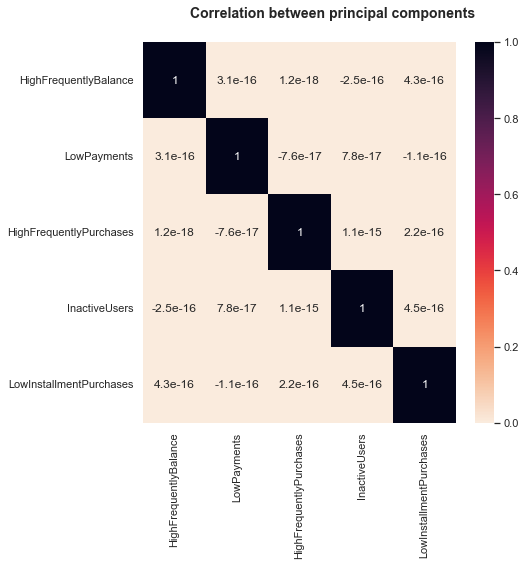

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.suptitle('Correlation between principal components', fontweight="bold", fontsize=14, y=0.95)
ax = sns.heatmap(df_plot.corr(), annot=True, cmap='rocket_r')
plt.show()

**Comments:** </br>
- Each feature is scaled, incorrelated and reduced from 17 to 5 components.

## Clustering

In [49]:
from sklearn.cluster import KMeans

wcss = [] # within-cluster sum of square 
for k in range(2,18):
    k_means = KMeans(n_clusters=k, init='k-means++')
    k_means.fit(df_plot)
    wcss.append( k_means.inertia_ )

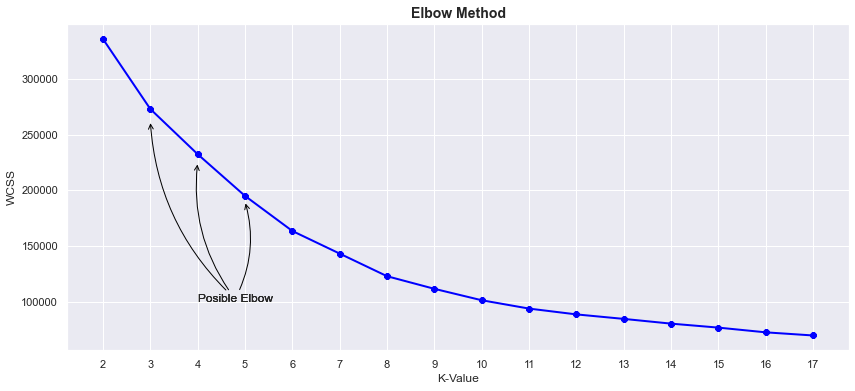

In [50]:
fig, ax = plt.subplots()

fig.set_size_inches(14, 6)
ax.plot( range(2,18), wcss,linewidth=2, color="blue", marker ="8")
ax.set_title('Elbow Method', fontweight="bold", fontsize=14 )
ax.set_xlabel('K-Value')
ax.set_ylabel('WCSS')
ax.set_xticks(np.arange(2,18,1))
an1 = ax.annotate('Posible Elbow',
            xy=(3,262_000),
            xytext=(4, 100_000),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=-0.2'})
an2 = ax.annotate('Posible Elbow',
            xy=(4,225_000),
            xytext=(4, 100_000),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=-0.2'})
an3 = ax.annotate('Posible Elbow',
            xy=(5,190_000),
            xytext=(4, 100_000),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=0.2'})
plt.show()

- For Elbow Method criteria, the amount of clusters would be 3, 4 and 5.

In [51]:
from sklearn import metrics

sil_scores = []
predict = -1

for k in range(2,18):
    k_means = KMeans(n_clusters=k, init='k-means++',random_state=11)
    k_means.fit(df_plot)
    predict = k_means.predict(df_plot)
    sil_scores.append(metrics.silhouette_score(df_plot, predict, metric="euclidean"))

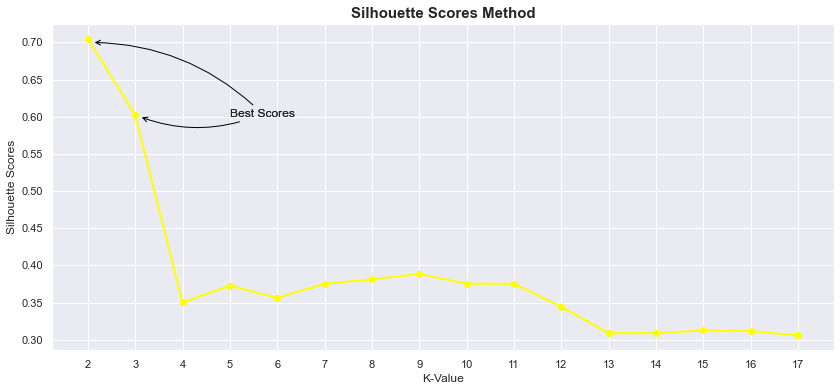

In [52]:
fig, ax = plt.subplots()

fig.set_size_inches(14, 6)
ax.plot( range(2,18), sil_scores,linewidth=2, color="yellow", marker ="8")
ax.set_title('Silhouette Scores Method', fontweight="bold", fontsize=15)
ax.set_xlabel('K-Value')
ax.set_ylabel('Silhouette Scores')
ax.set_xticks(np.arange(2,18,1))
an1 = ax.annotate('Best Scores',
            xy=(2.1,0.70),
            xytext=(5, 0.60),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=0.2'})
an1 = ax.annotate('Best Scores',
            xy=(3.1,0.60),
            xytext=(5, 0.60),
            arrowprops={'arrowstyle':'->', 'color':'black','connectionstyle':'arc3,rad=-0.2'})
plt.show()

- For Silhouette Scores criteria, the best amount of clusters are 2 and 3.

**Comments:** <br>
- Both mehods have a coincidence which is making 3 clusters. So, I will use that number of clusters.

In [53]:
from sklearn.cluster import KMeans

km = KMeans(3, # Cuántos clusters
            init='k-means++', # Elección de centroides inteligente (++)
            random_state=10)

In [54]:
km.fit(df_plot)

KMeans(n_clusters=3, random_state=10)

These ones are the cluster centroids:

In [55]:
km.cluster_centers_

array([[-7.38529598e-01,  8.93233552e-02,  4.63764454e-02,
        -2.05896514e-02,  7.94070402e-03],
       [ 1.08370211e+01, -5.11177860e+00,  2.98131371e-01,
         5.34779225e-02, -1.16746473e-01],
       [ 1.69127268e+01,  2.77398595e+01, -8.73080456e+00,
         2.41995263e+00, -1.80072912e-01]])

In [56]:
labels_culusters = km.predict(df_plot)

In [57]:
df_plot['Cluster'] = labels_culusters

In [58]:
df_plot.sample(3)

,HighFrequentlyBalance,LowPayments,HighFrequentlyPurchases,InactiveUsers,LowInstallmentPurchases,Cluster
4882,0.544576,-2.866040,-1.718781,1.597303,-1.681302,0
8727,-2.734145,-0.068788,-0.252625,0.207535,0.990094,0
4751,-1.085721,-0.693717,-0.775423,-1.986269,0.464315,0


In [59]:
df_plot.groupby('Cluster').count()

,HighFrequentlyBalance,LowPayments,HighFrequentlyPurchases,InactiveUsers,LowInstallmentPurchases
Cluster,,,,,
0,8412,8412,8412,8412,8412
1,477,477,477,477,477
2,61,61,61,61,61


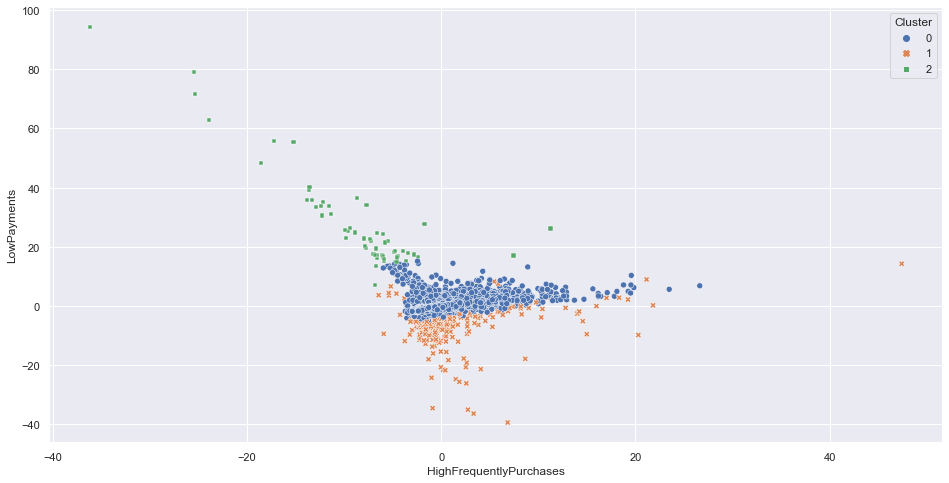

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
sns.scatterplot(x='HighFrequentlyPurchases',y='LowPayments',hue='Cluster',data=df_plot, style='Cluster',palette='deep')
plt.show()

## Conlusions

<a href="https://imgbb.com/"><img src="https://i.ibb.co/L80qTch/results.png" alt="results" border="0"></a>